# Empirical Project I - US Exports Analysis using Gravity Model

### Reference: "The Gravity Mode of International Trade: A User Guide". Ben Shepard. UN ESCAP 2012

In [2]:
import stata_setup
stata_setup.config("/Applications/Stata 17", "be")


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       BE—Basic Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user  perpetual
Serial number: 301706309873
  Licensed to: Jon Holder
               

Notes:
      1. Unicode is supported; see help unicode_advice.


In [62]:
%%capture
%%stata
log using "gravityAnalysis.txt", replace

In [63]:
%%stata
use "Data/gravityModelData.dta", clear
describe


. use "Data/gravityModelData.dta", clear

. describe

Contains data from Data/gravityModelData.dta
 Observations:           219                  
    Variables:            13                  4 Jul 2021 18:29
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
countryName     str32   %32s                  countryName
iso3Code        str3    %9s                   ISO-3 Character Country Code
overSeasTerr    str3    %9s                   Country Code of Country this
                                                observation is an teritory of
distanceKm      double  %10.0g                distance from USA Capital to
                                                Country Capital
dup             byte    %12.0g                
gdp             double  %10.0g                Country GD

---

#### Model specification:

$ln(X_{USA \rightarrow j}) = \beta_0 + \delta_0$common_lang$ + \delta_1 sharedBorder + \beta_1 ln(GDP_j) + \beta_2 ln(\tau_{USA \rightarrow j}) +  \delta_2 ($*common_lang#*$ln(\tau_{USA \rightarrow j})) + e_{USA \rightarrow j}$

$\tau_{USA \rightarrow j}$ = Great circle distance between Washington, DC and trading partner's capital in km.

In [64]:
%%stata
summarize usExp gdp distanceKm
tab common_lang


. summarize usExp gdp distanceKm

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       usExp |        219    7.41e+09    2.92e+10       4364   3.12e+11
         gdp |        190    3.20e+11    9.88e+11   1.17e+08   1.05e+13
  distanceKm |        209    8718.804    3701.592    733.894   16834.42

. tab common_lang

      =1 if |
 English is |
        the |
langauge of |
        the |
   country. |
  Otherwise |
         =0 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        182       83.11       83.11
          1 |         37       16.89      100.00
------------+-----------------------------------
      Total |        219      100.00

. 


In [65]:
%%stata
list country iso3Code usExp if gdp==.


     +-------------------------------------------------------+
     |                    countryName   iso3Code       usExp |
     |-------------------------------------------------------|
  6. |                       Anguilla        AIA    63206326 |
 10. |                          Aruba        ABW   1.340e+09 |
 22. |                        Bermuda        BMU   6.452e+08 |
 28. | British Indian Ocean Territory        IOT     2099098 |
 29. |         British Virgin Islands        VGB   3.868e+08 |
     |-------------------------------------------------------|
 40. |                 Cayman Islands        CYM   8.108e+08 |
 45. |               Christmas Island        CXR      727849 |
 46. |        Cocos (Keeling) Islands        CCK     6040796 |
 50. |                   Cook Islands        COK     5486093 |
 54. |                        Curacao        CUW   6.127e+08 |
     |-------------------------------------------------------|
 66. |                        Eritrea        ERI     5

In [66]:
%%stata
corr lUsExp lGdp

(obs=190)

             |   lUsExp     lGdp
-------------+------------------
      lUsExp |   1.0000
        lGdp |   0.8474   1.0000




. twoway (scatter lUsExp lGdp) (lfit lUsExp lGdp), ///
>     ytitle("ln(US Exports)") ///
>     xtitle("ln(Trading Partner GDP)") ///
>     title("Value of US Exports and Trading Partner GDP" "2014") ///
>     caption("Correlation: 0.8474" "Number of Observations: 189") ///
>     legend(off)

. graph export expsGdpScatter.png, replace
file expsGdpScatter.png written in PNG format

. 


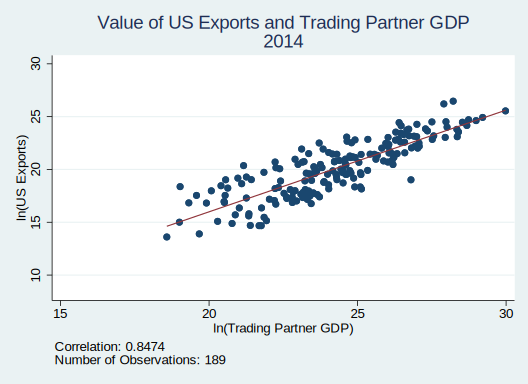

In [67]:
%%stata
twoway (scatter lUsExp lGdp) (lfit lUsExp lGdp), ///
    ytitle("ln(US Exports)") ///
    xtitle("ln(Trading Partner GDP)") ///
    title("Value of US Exports and Trading Partner GDP" "2014") ///
    caption("Correlation: 0.8474" "Number of Observations: 189") ///
    legend(off)
graph export expsGdpScatter.png, replace

In [68]:
%%stata
corr lUsExp ldist

(obs=209)

             |   lUsExp    ldist
-------------+------------------
      lUsExp |   1.0000
       ldist |  -0.2325   1.0000




. twoway (scatter lUsExp ldist) (lfit lUsExp ldist), ///
>     ytitle("ln(US Exports)") ///
>     xtitle("ln(Distance between Capitals (km))") ///
>     title("Value of US Exports and Distance" "between Trading Partners (km)")
>  ///
>     caption("Correlation: -0.2325" "Number of Observations: 219") ///
>     legend(off)

. graph export expsDistScatter.png, replace
file expsDistScatter.png written in PNG format

. 


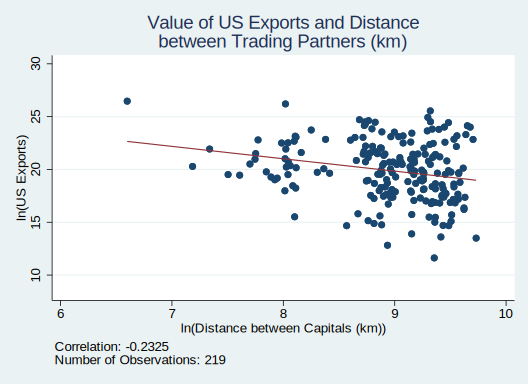

In [69]:
%%stata
twoway (scatter lUsExp ldist) (lfit lUsExp ldist), ///
    ytitle("ln(US Exports)") ///
    xtitle("ln(Distance between Capitals (km))") ///
    title("Value of US Exports and Distance" "between Trading Partners (km)") ///
    caption("Correlation: -0.2325" "Number of Observations: 219") ///
    legend(off)
graph export expsDistScatter.png, replace

In [70]:
%%stata
summarize distanceKm ldist


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
  distanceKm |        209    8718.804    3701.592    733.894   16834.42
       ldist |        209    8.950379    .5524233   6.598365   9.731181



. histogram distanceKm, frequency ///
>     title("Number of Trading Partners and Distance" "between Trading Partners
>  (km)") ///
>     ytitle("Number of Trading Partners")
(bin=14, start=733.894, width=1150.0378)

. graph export distanceHist.png, replace
file distanceHist.png written in PNG format

. 


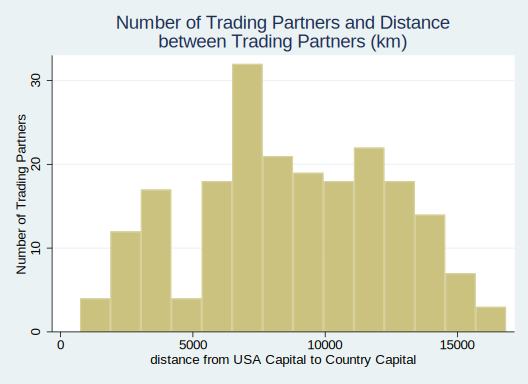

In [71]:
%%stata
histogram distanceKm, frequency ///
    title("Number of Trading Partners and Distance" "between Trading Partners (km)") ///
    ytitle("Number of Trading Partners")
graph export distanceHist.png, replace

In [72]:
%%stata
summarize usExp if distance<=4000
summarize usExp if distance>4000


. summarize usExp if distance<=4000

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       usExp |         32    2.01e+10    6.80e+10    5486093   3.12e+11

. summarize usExp if distance>4000

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       usExp |        187    5.24e+09    1.39e+10       4364   1.24e+11

. 


Most US trading partners are located relatively far from USA while the size of exports to the trading partner is larger for partners closer to USA.

In [73]:
%%stata
regress lUsExp lGdp ldist i.common_lang i.sharedBorder i.common_lang#c.ldist
outreg using empPrj1.doc, se replace


. regress lUsExp lGdp ldist i.common_lang i.sharedBorder i.common_lang#c.ldist

      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(5, 183)       =    132.21
       Model |  1036.27008         5  207.254016   Prob > F        =    0.0000
    Residual |   286.87078       183  1.56759989   R-squared       =    0.7832
-------------+----------------------------------   Adj R-squared   =    0.7773
       Total |  1323.14086       188   7.0379833   Root MSE        =     1.252

------------------------------------------------------------------------------
      lUsExp | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        lGdp |    .960062   .0397942    24.13   0.000     .8815475    1.038577
       ldist |  -1.210787   .2231876    -5.42   0.000    -1.651138   -.7704346
1.common_l~g |   1.328913   3.434492     0.39   0

In [74]:
%%stata
test 1.common_lang 1.sharedBorder 1.common_lang#c.ldist


 ( 1)  1.common_lang = 0
 ( 2)  1.sharedBorder = 0
 ( 3)  1.common_lang#c.ldist = 0

       F(  3,   183) =    1.66
            Prob > F =    0.1770


In [75]:
%%stata
regress lUsExp lGdp ldist
outreg using empPrj1.doc, se merge replace


. regress lUsExp lGdp ldist

      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(2, 186)       =    324.57
       Model |  1028.45738         2  514.228691   Prob > F        =    0.0000
    Residual |   294.68348       186  1.58431978   R-squared       =    0.7773
-------------+----------------------------------   Adj R-squared   =    0.7749
       Total |  1323.14086       188   7.0379833   Root MSE        =    1.2587

------------------------------------------------------------------------------
      lUsExp | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        lGdp |   .9572798   .0392415    24.39   0.000     .8798642    1.034695
       ldist |  -1.266136   .1776172    -7.13   0.000    -1.616539    -.915733
       _cons |   8.249952   1.867455     4.42   0.000     4.565837    11.93407
---------------------

In [76]:
%%stata
regress lUsExp c.lGdp c.ldist i.tradeAgreement#c.ldist i.tradeAgreement
outreg using empPrj1.doc, se merge replace


. regress lUsExp c.lGdp c.ldist i.tradeAgreement#c.ldist i.tradeAgreement

      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(4, 184)       =    163.88
       Model |  1033.14883         4  258.287209   Prob > F        =    0.0000
    Residual |  289.992027       184  1.57604362   R-squared       =    0.7808
-------------+----------------------------------   Adj R-squared   =    0.7761
       Total |  1323.14086       188   7.0379833   Root MSE        =    1.2554

------------------------------------------------------------------------------
      lUsExp | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        lGdp |   .9541935   .0392174    24.33   0.000       .87682    1.031567
       ldist |  -1.272374   .1772125    -7.18   0.000    -1.622004   -.9227443
             |
tradeAgree~t#|
     c.ldist |
         

In [77]:
%%stata
test 1.tradeAgreement 1.tradeAgreement#c.ldist


 ( 1)  1.tradeAgreement = 0
 ( 2)  1.tradeAgreement#c.ldist = 0

       F(  2,   184) =    1.49
            Prob > F =    0.2284


In [78]:
%%capture
%%stata
log close
clear